In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:

file_name ="test.csv"
df =  pd.read_csv(file_name)
#df.head()

In [4]:
for i in df.columns:
    print(f'{i} is a ',df[f'{i}'].dtype)

A is a  int64
B is a  float64
C is a  float64
D is a  object


# Ajouter un truc pour gérer les variables catégorielles

In [5]:

count_nan=df.isna().sum()
print(f"Il y'a {len(df.columns)} colonnes ({[i for i in df.columns]}) et {len(df)} lignes dans le fichier {file_name},\nLes NAN par colonnes sont: \n{count_nan}")
print ('Voilà la description plus précise des différentes colonnes du fichier :')
df.describe()

Il y'a 4 colonnes (['A', 'B', 'C', 'D']) et 20 lignes dans le fichier test.csv,
Les NAN par colonnes sont: 
A     0
B     0
C    10
D     1
dtype: int64
Voilà la description plus précise des différentes colonnes du fichier :


,A,B,C
count,20.000000,20.000000,10.000000
mean,49.200000,-0.506251,11.500000
std,32.393307,0.818029,6.055301
min,2.000000,-1.913280,2.500000
25%,21.750000,-1.047372,7.000000
50%,52.500000,-0.505056,11.500000
75%,77.000000,0.078377,16.000000
max,93.000000,1.465649,20.500000


Deleting columns with missing values: 

In [6]:
#for i in df.columns:
#    if count_nan[i] != 0:
#        df.drop([i], axis=1, inplace=True)
# print ('nombre de nan :'count_nan)

Supprimer les missing values:

In [7]:
df = df.dropna()
# print ('nombre de nan :'count_nan)

# Il manque la méthode KNN 

# Normalisation
* Il manque encore:
* The Z-score standardization, which resizes the data to have a mean of 0 and a standard
deviation of 1.
* Other normalization methods

In [8]:
scaler =MinMaxScaler()


In [9]:
numerical_columns = []
for i in df.columns:
    if df[i].dtype == "int64" or df[i].dtype == float:
        numerical_columns.append(i)
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [10]:
df

,A,B,C,D
1,1.000000,0.632400,0.000000,Z
3,0.769231,0.000000,0.111111,Z
5,0.208791,0.590216,0.222222,Y
7,0.934066,0.973154,0.333333,Y
9,0.802198,0.218865,0.444444,Y
11,0.241758,0.737230,0.555556,Y
13,0.219780,0.213428,0.666667,Y
17,0.307692,1.000000,0.888889,Y
19,0.000000,0.708432,1.000000,Y


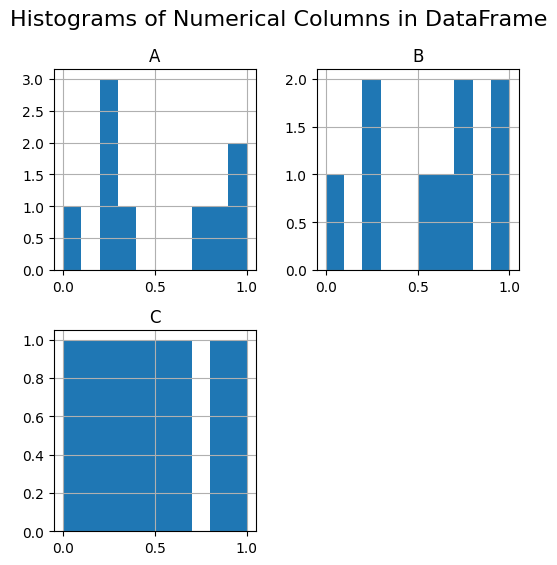

In [11]:
df.hist(bins=10,figsize=(6, 6), grid=True)
plt.suptitle('Histograms of Numerical Columns in DataFrame', fontsize=16)
plt.show()

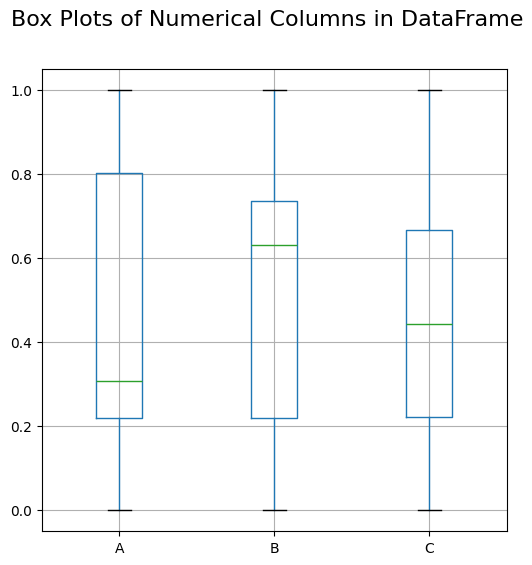

In [12]:
df.boxplot(column=numerical_columns, figsize=(6, 6))
plt.suptitle('Box Plots of Numerical Columns in DataFrame', fontsize=16)
plt.show()

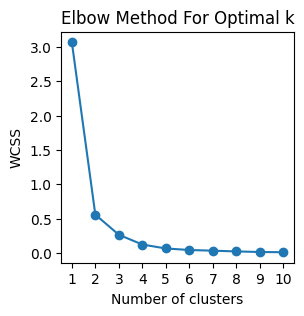

In [13]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_columns].values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(3, 3))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.show()

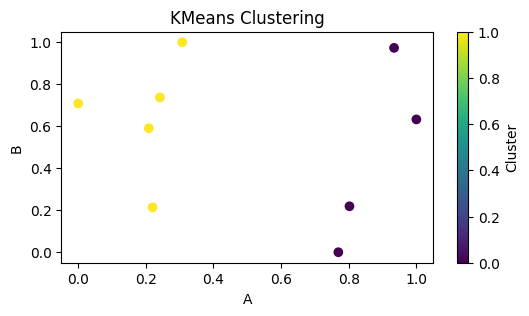

In [16]:

chosen_params = ['A','B']
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

plt.figure(figsize=(6, 3))
plt.scatter(df[chosen_params[0]], df[chosen_params[1]], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('A')
plt.ylabel('B')
plt.colorbar(label='Cluster')
plt.show()